# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Noam Cohen 209263805
2.   Tomer Katzav 207219783

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [3]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')
df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
plt.style.use('fivethirtyeight')


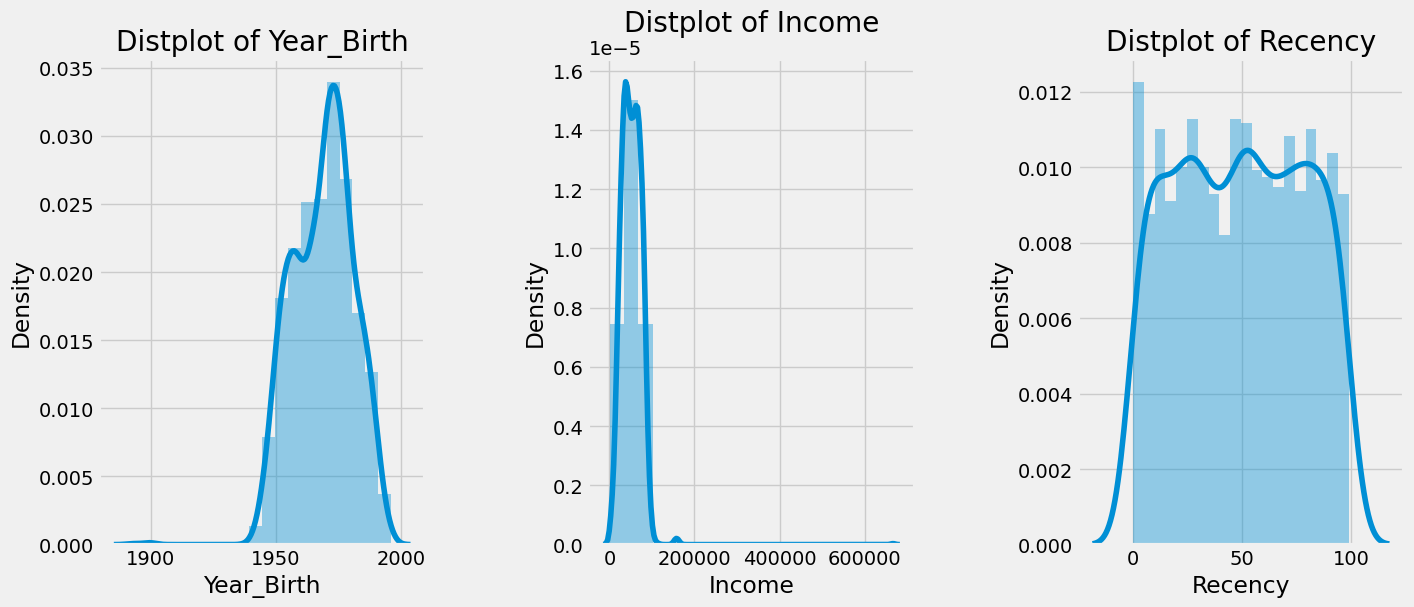

In [5]:
# Graph 1 - Histograms
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Year_Birth' , 'Income', 'Recency']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


**Insight** - This histograms displays the distribution of Year Birth in different years within the range of 1945 to 2000 and different Income in ranging from 0 to 100,000 and recency values within the range of 0 to 100.

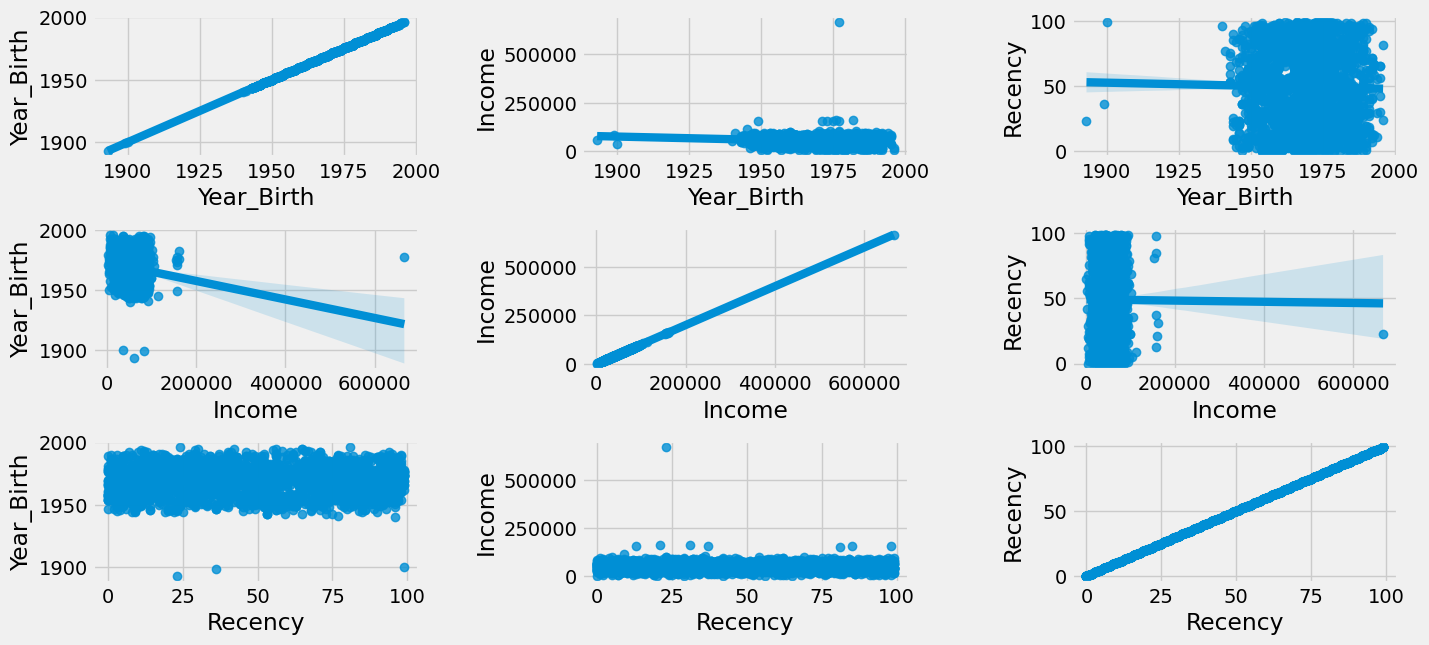

In [6]:
# Graph 2 - Plotting the Relation between features
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Year_Birth' , 'Income', 'Recency']:
    for y in ['Year_Birth' , 'Income', 'Recency']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

**Insight** - Incomes are greater for people born between 1970-1980

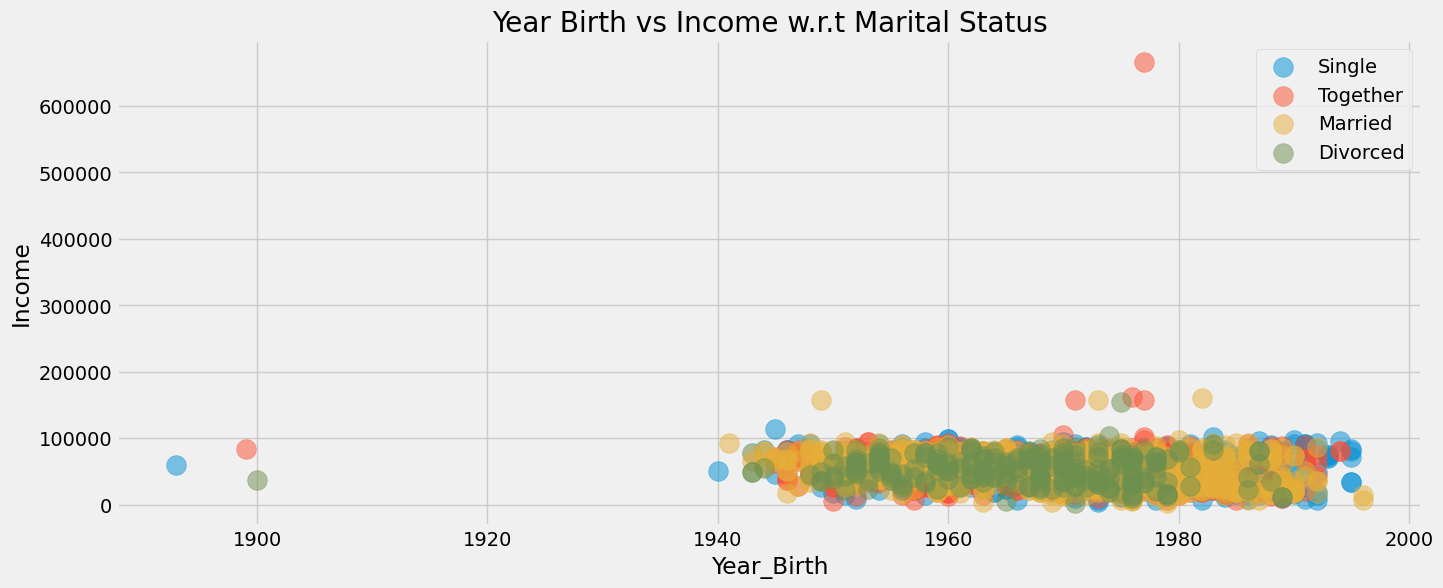

In [7]:
# Graph 3 - correlation using heatmap
plt.figure(1 , figsize = (15 , 6))
for Marital_Status in ['Single' , 'Together', 'Married', 'Divorced']:
    plt.scatter(x = 'Year_Birth' , y = 'Income' , data = df[df['Marital_Status'] == Marital_Status] ,
                s = 200 , alpha = 0.5 , label = Marital_Status)
plt.xlabel('Year_Birth'), plt.ylabel('Income')
plt.title('Year Birth vs Income w.r.t Marital Status')
plt.legend()
plt.show()

**Insight** - You can see that the income of Divorced people is about average as among others the population, in addition it can be noticed that the income of people who are Together is higher than the average income of the population.

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [8]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Scale the data using MinMaxScaler
minmax_scale = MinMaxScaler()
columns_to_scale = ['Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'Z_CostContact', 'Z_Revenue', 'Response']
df_minmax = minmax_scale.fit_transform(df[columns_to_scale])
df_minmax_fill = np.nan_to_num(df_minmax, nan=0)

# Encode categorical variables
one_hot_encoder = OneHotEncoder()
encoded_categorial = one_hot_encoder.fit_transform(df[['Education', 'Marital_Status']])

# Get column names for the one-hot encoded categorical variables
encoded_categorical_columns = one_hot_encoder.get_feature_names_out(['Education', 'Marital_Status'])

# Convert encoded_categorical to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorial.toarray(), columns=encoded_categorical_columns)

# Concatenate df_minmax_filled with encoded_categorical_df
df_minmax_filled = pd.concat([pd.DataFrame(df_minmax_fill, columns=columns_to_scale), encoded_categorical_df], axis=1)
# df_minmax_filled.head()


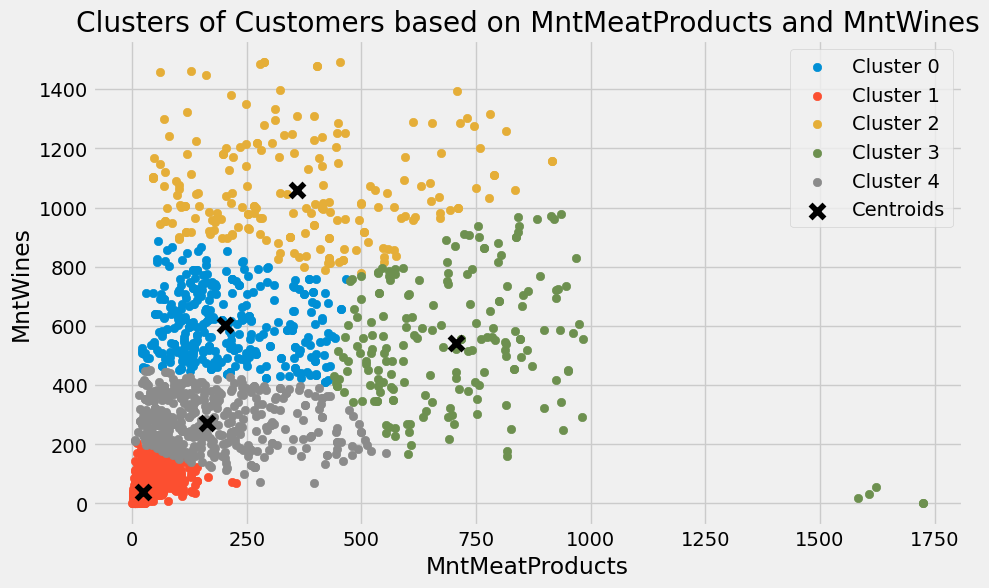

In [10]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
features = ['MntMeatProducts', 'MntWines']
X = df[features]
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(X)

# Getting the cluster labels
cluster_labels = kmeans.labels_
# Adding cluster labels to the DataFrame
df['Cluster'] = cluster_labels


# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(X.loc[df['Cluster'] == cluster, 'MntMeatProducts'],
                X.loc[df['Cluster'] == cluster, 'MntWines'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', color='black', label='Centroids', s=100)
plt.xlabel('MntMeatProducts')
plt.ylabel('MntWines')
plt.title('Clusters of Customers based on MntMeatProducts and MntWines')
plt.legend()
plt.grid(True)
plt.show()

### Elbow

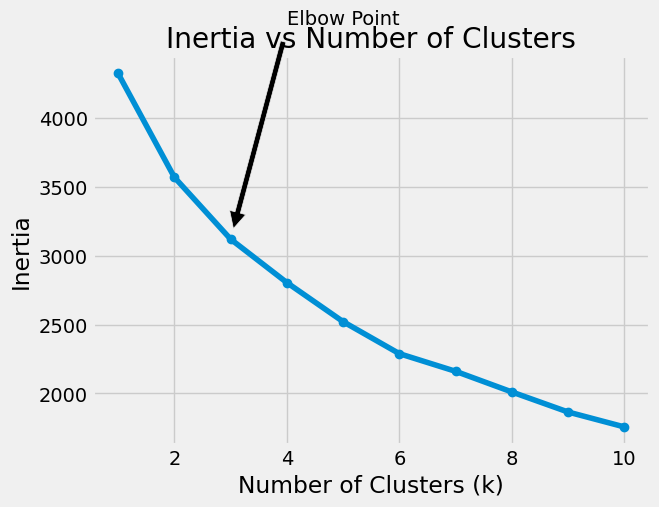

In [11]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_minmax_filled)
    inertia.append(kmeans.inertia_)

# Find and Mark the "elbow" point on the plot
plt.annotate('Elbow Point', xy=(3, inertia[2]), xytext=(4, inertia[2]*1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()

### Silhouette Score

For n_clusters = 2 ,The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 ,The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 ,The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 ,The average silhouette_score is : 0.56376469026194
For n_clusters = 6 ,The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 ,The average silhouette_score is : 0.39092211029930857
For n_clusters = 8 ,The average silhouette_score is : 0.3314853899648912
Optimal k: 2


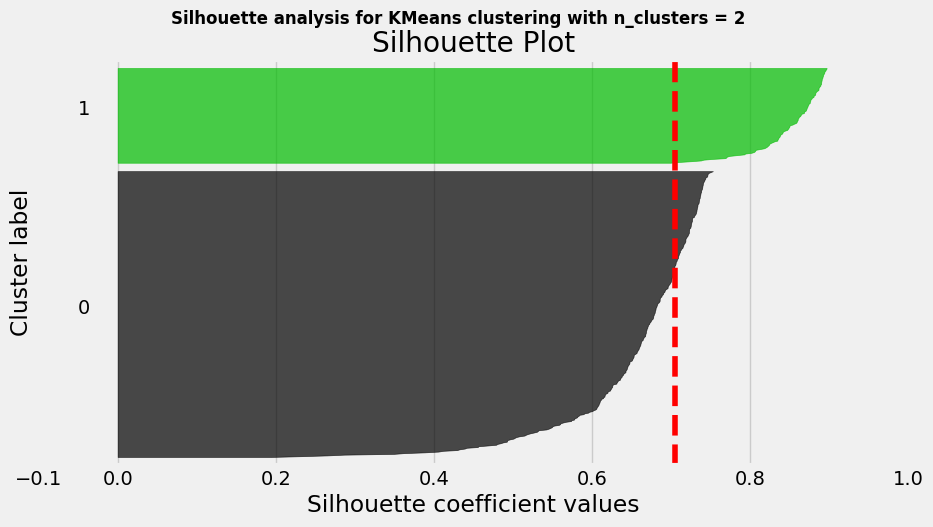

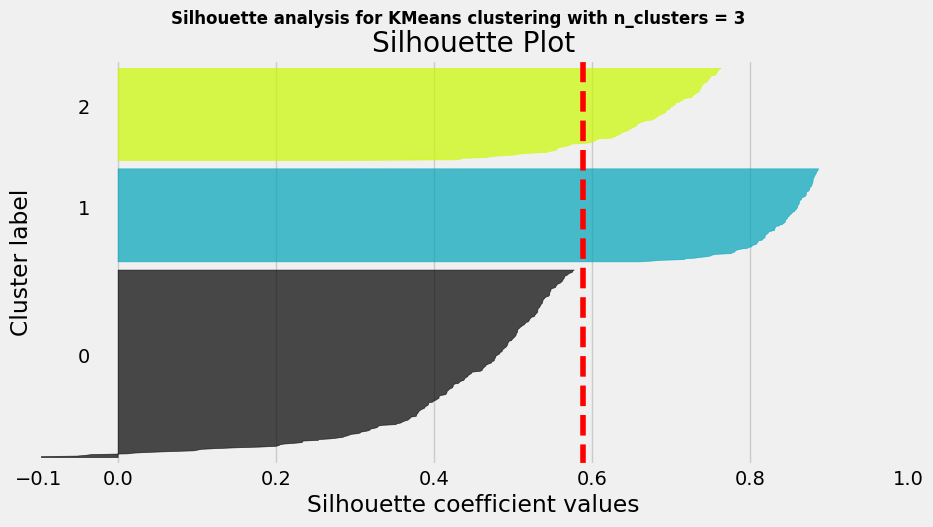

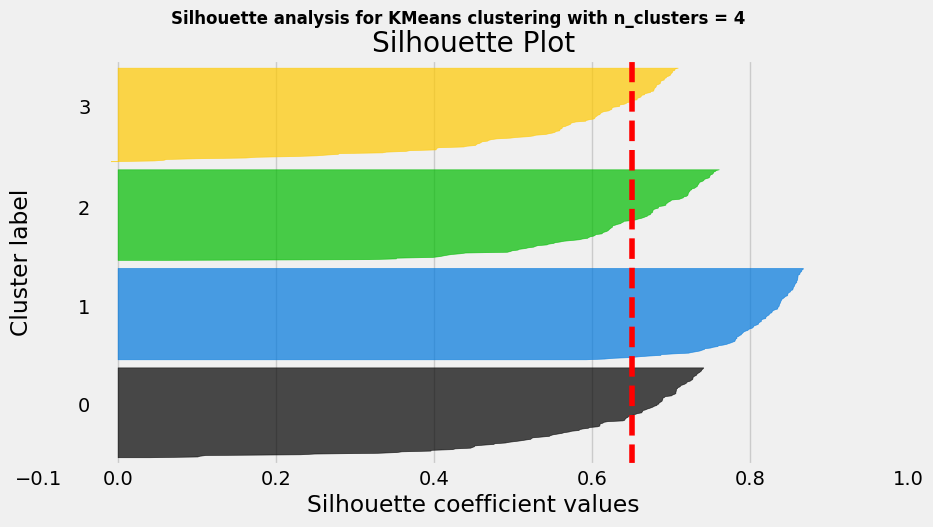

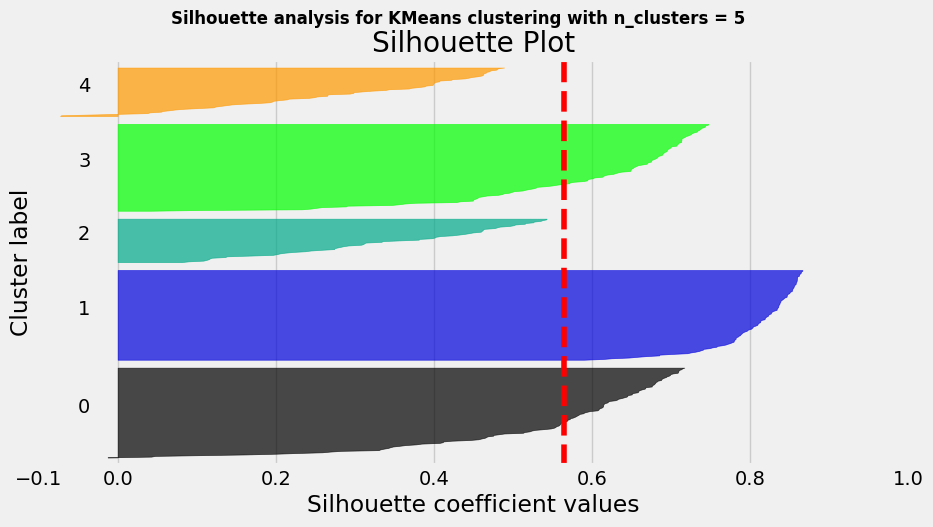

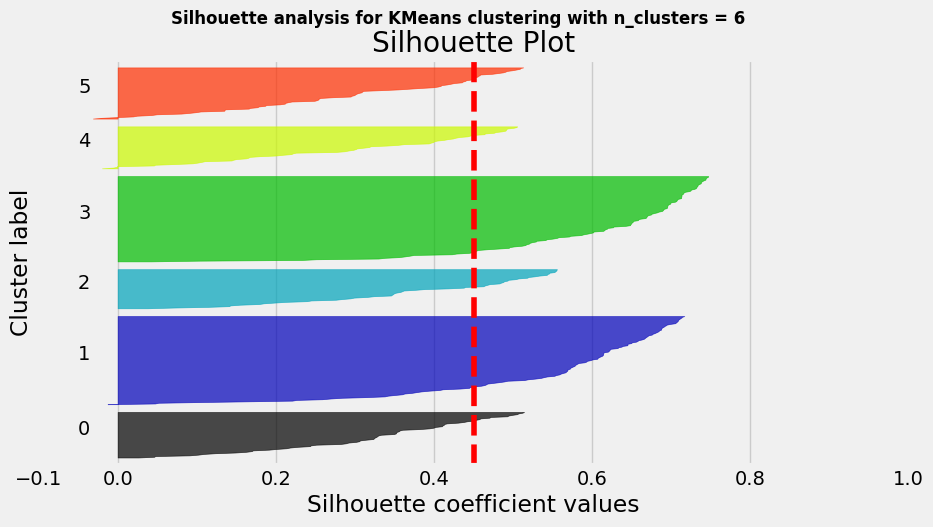

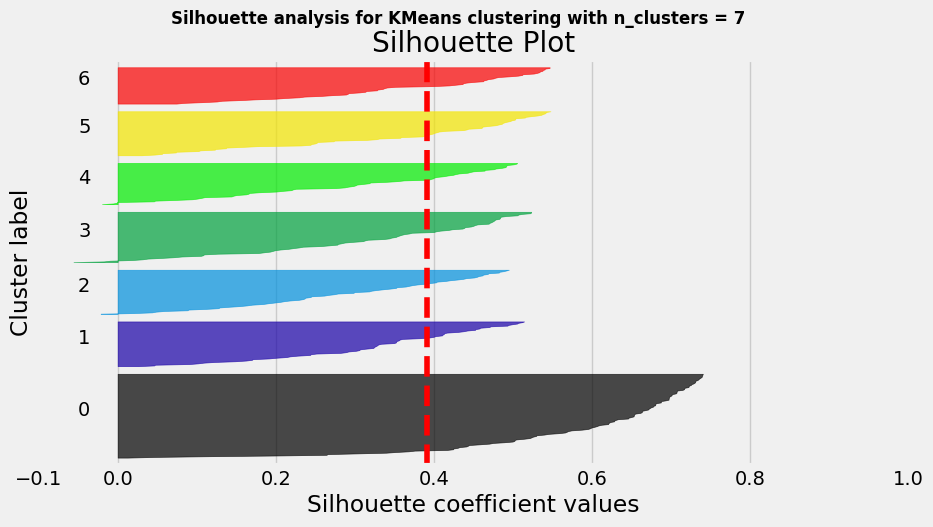

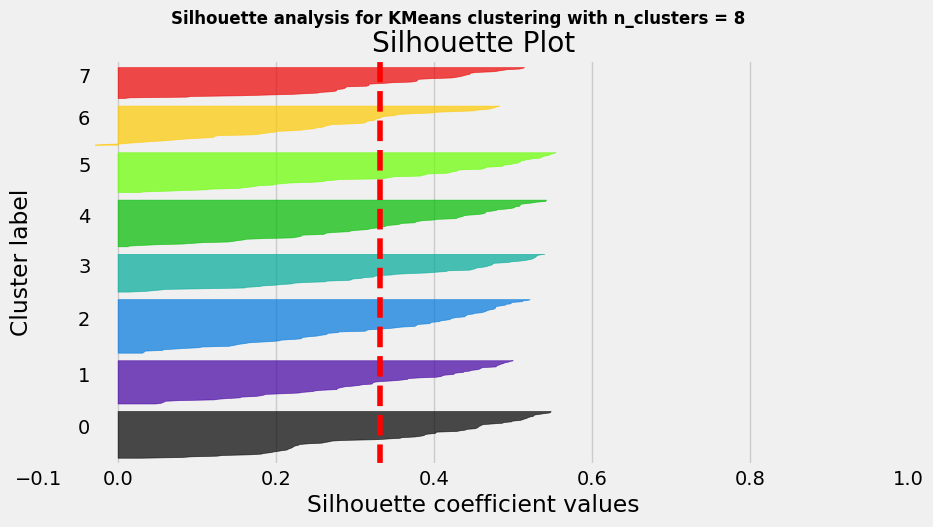

In [12]:
# Generate sample data
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

optimal_k = None
max_silhouette_score = -1

# Iterate over range of clusters
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 5)  # Set smaller figure size
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        ",The average silhouette_score is :",
        silhouette_avg,
    )

    # Check if silhouette score is maximum
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_k = n_clusters

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=12,
        fontweight="bold",
    )

print("Optimal k:", optimal_k)

plt.show()

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





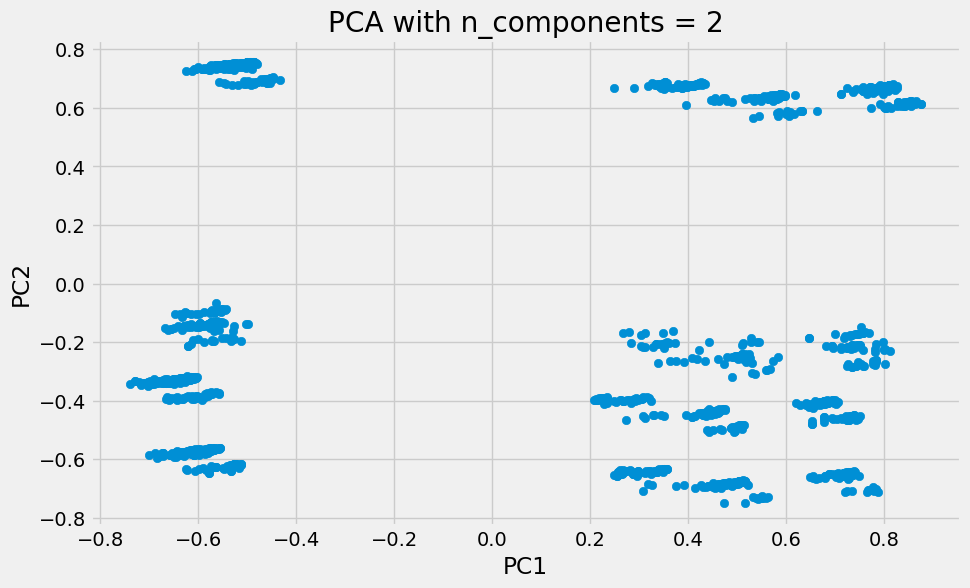

Explained variance: [0.17900479 0.16901791]


In [13]:
# Adjust n_components as needed
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax_filled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Plotting the PCA
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with n_components = 2')
plt.grid(True)
plt.show()

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print('Explained variance:', explained_variance)

**Q**: What is the variance explained in the 2 component PCA?




**A**:
Explained variance by PC1: 0.17900479

Explained variance by PC2: 0.16901791

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [14]:
# Run PCA with n_components = 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax_filled)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])


### Elbow

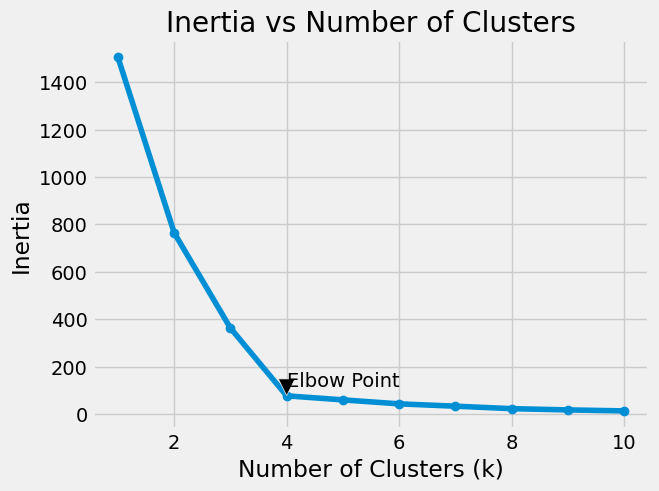

In [15]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Find and Mark the "elbow" point on the plot
plt.annotate('Elbow Point', xy=(4, inertia[3]), xytext=(4, inertia[3]*1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()


### Silhouette

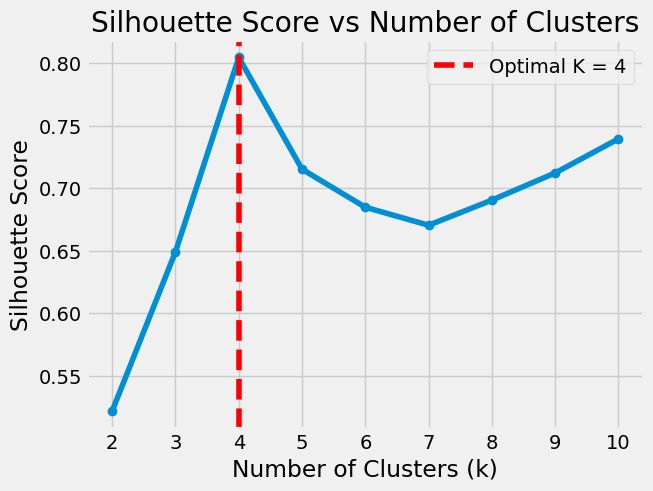

In [16]:
# prompt: silhoute method

silhouettes = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_pca)
    silhouettes.append(silhouette_score(df_pca, kmeans.labels_))

# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouettes, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

# Select the optimal number of clusters based on silhouette scores
optimal_k = range(2, 11)[silhouettes.index(max(silhouettes))]

# Display the chosen K on the graph
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











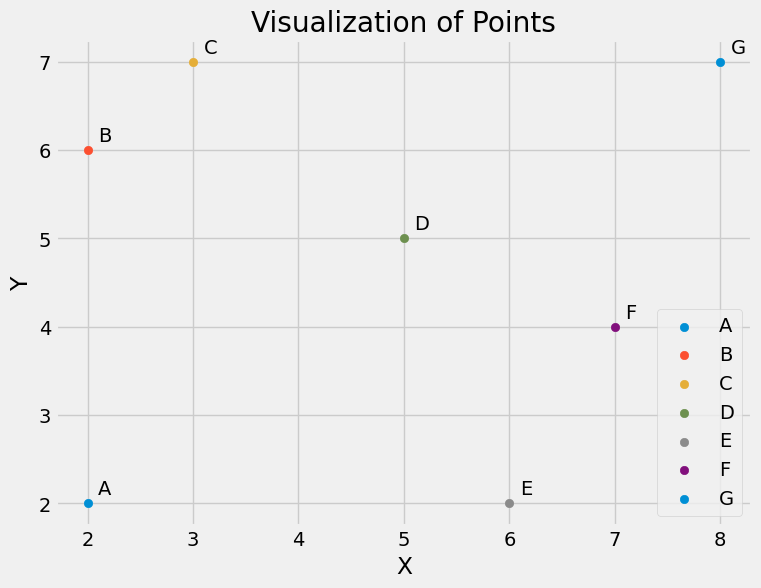

In [17]:
import matplotlib.pyplot as plt

# Given points
points = {
    'A': (2, 2),
    'B': (2, 6),
    'C': (3, 7),
    'D': (5, 5),
    'E': (6, 2),
    'F': (7, 4),
    'G': (8, 7)
}

# Plot the points
plt.figure(figsize=(8, 6))
for label, point in points.items():
    plt.scatter(point[0], point[1], label=label)

# Label each point
for label, point in points.items():
    plt.text(point[0] + 0.1, point[1] + 0.1, label)

# Add labels and grid
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Points')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


***Answer 2:***
Initial cluster centers: A,D,C.

After K-means algorithm:

cluster centers 1:(2.5,6.5), Points: {A}

cluster centers 2:(6.5,4.5), Points: {B,C}

cluster centers 3:(2,2), Points: {D,E,F,G}



**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1. The points grouped together based on their proximity to the initial cluster centers. Each point is assigned to the cluster with the nearest cluster center.
2. Yes, choosing different initial cluster centers can lead to different final clusters. This occurs because K-means clustering is sensitive to the initial selection of cluster centers. Depending on the initial centers chosen, the algorithm may converge to different local optima, resulting in different final clusters.
3. K-means clustering is applicable in various real-world scenarios, including customer segmentation, image segmentation, anomaly detection, document clustering, and genetic clustering. It's useful in any situation where data needs to be grouped or segmented based on similarity or proximity.



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}